# Visualizing Errors

# Error Bars in Data Visualization

Error bars are **visual representations of variability or uncertainty** in your data. They show how much the data might vary and give a sense of the **accuracy** of your measurements or predictions.

---

## **For Example**:
- If you're measuring something multiple times, error bars can show the range of those measurements.
- They can help indicate the **reliability** of your data.

---

## **Explaining with an Analogy**
Imagine you’re throwing darts at a target, and you hit a slightly different spot each time:
- The **center of the dartboard** is your **data point**.
- The **error bar** shows how far your darts might be from the center based on your throws.
  - **Longer error bars** mean more variability.
  - **Shorter error bars** mean more consistency.

---


## Basic Errorbars

A basic errorbar can be created with a single Matplotlib function call:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Sample x values: [0.         0.20408163 0.40816327 0.6122449  0.81632653]
Sample y values with noise: [-0.5792792   0.20543199  1.11799131 -0.13582717  1.50136331]
Error range for y values (dy): 0.8


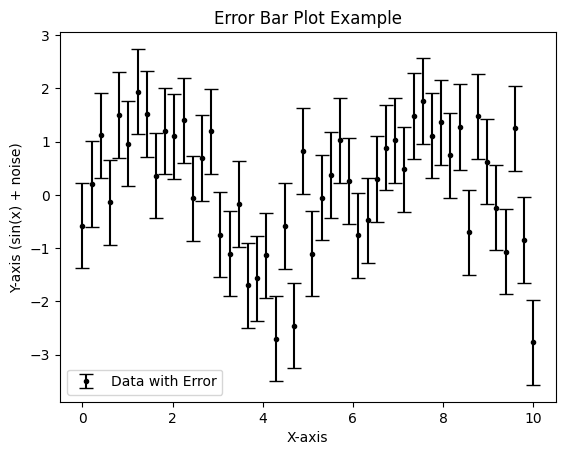

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 50 evenly spaced points between 0 and 10
x = np.linspace(0, 10, 50)

# Define the error range (dy) for the y-values
dy = 0.8

# Generate y-values based on the sine function with added random noise
y = np.sin(x) + dy * np.random.randn(50)

# Print some sample values to understand the data
print("Sample x values:", x[:5])
print("Sample y values with noise:", y[:5])
print("Error range for y values (dy):", dy)

# Create an error bar plot
plt.errorbar(x, y, yerr=dy, fmt='.k',  # '.k' specifies black dots as markers
             capsize=5,                # Adds caps at the end of error bars
             label='Data with Error')  # Add a label for the legend

# Add labels and a title for better understanding
plt.xlabel("X-axis")
plt.ylabel("Y-axis (sin(x) + noise)")
plt.title("Error Bar Plot Example")
plt.legend()  # Display the legend

# Show the plot
plt.show()
# upper is +dy
# lowe is -dy

Here the ``fmt`` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in ``plt.plot``, outlined in [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb).

In addition to these basic options, the ``errorbar`` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves:

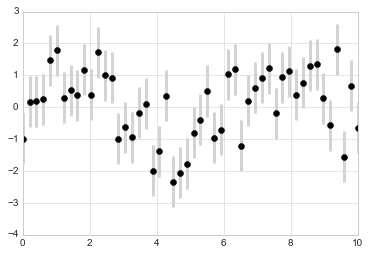

In [3]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

In addition to these options, you can also specify horizontal errorbars (``xerr``), one-sided errorbars, and many other variants.
For more information on the options available, refer to the docstring of ``plt.errorbar``.

## Continuous Errors

A continuous error plot is a plot where the error bars or shaded regions represent the uncertainty or variability across a continuous function, such as a line or curve. Instead of error bars at discrete points, you show the range of possible values for the function continuously.

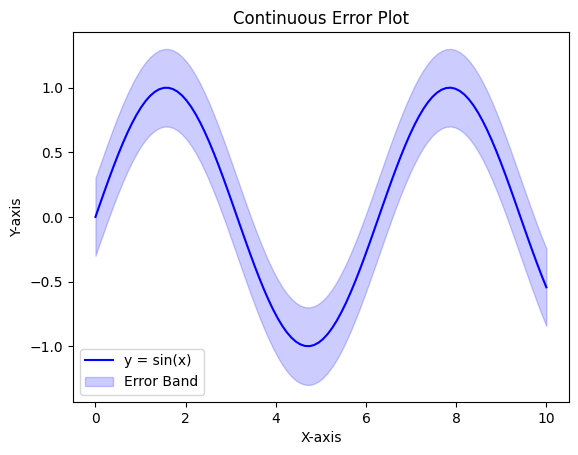

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values and compute the function y = sin(x)
x = np.linspace(0, 10, 100)  # 100 points between 0 and 10
y = np.sin(x)  # Function values

# Define the error (e.g., constant or variable)
error = 0.3

# Compute the upper and lower bounds of the error
y_upper = y + error
y_lower = y - error

# Plot the function
plt.plot(x, y, label="y = sin(x)", color="blue")

# Fill the area between y_upper and y_lower to represent the error
plt.fill_between(x, y_lower, y_upper, color="blue",
                 alpha=0.2, label="Error Band")

# Add labels, legend, and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Continuous Error Plot")
plt.legend()

# Show the plot
plt.show()

Note what we've done here with the ``fill_between`` function: we pass an x value, then the lower y-bound, then the upper y-bound, and the result is that the area between these regions is filled.

The resulting figure gives a very intuitive view into what the Gaussian process regression algorithm is doing: in regions near a measured data point, the model is strongly constrained and this is reflected in the small model errors.
In regions far from a measured data point, the model is not strongly constrained, and the model errors increase.

For more information on the options available in ``plt.fill_between()`` (and the closely related ``plt.fill()`` function), see the function docstring or the Matplotlib documentation.

Finally, if this seems a bit too low level for your taste, refer to [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), where we discuss the Seaborn package, which has a more streamlined API for visualizing this type of continuous errorbar.